could also use model = "llama2-uncensored"


country: {'an American': {'IOU': 0.5192307692307693, 'SERP MS': 0.23901960784313725, 'Pragmatic': 0.5357142857142857, 'mean_rank': 161.40625}, 'a Brazilian': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': nan}, 'a British': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 408.6896551724138}, 'a Chinese': {'IOU': 0.5490196078431373, 'SERP MS': 0.2419607843137255, 'Pragmatic': 0.548469387755102, 'mean_rank': 174.81578947368422}, 'a French': {'IOU': 0.27419354838709675, 'SERP MS': 0.1588235294117647, 'Pragmatic': 0.44302721088435376, 'mean_rank': 87.15}, 'a German': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 427.85714285714283}, 'a Japanese': {'IOU': 0.5510204081632653, 'SERP MS': 0.28411764705882353, 'Pragmatic': 0.5331632653061225, 'mean_rank': 184.73684210526315}}


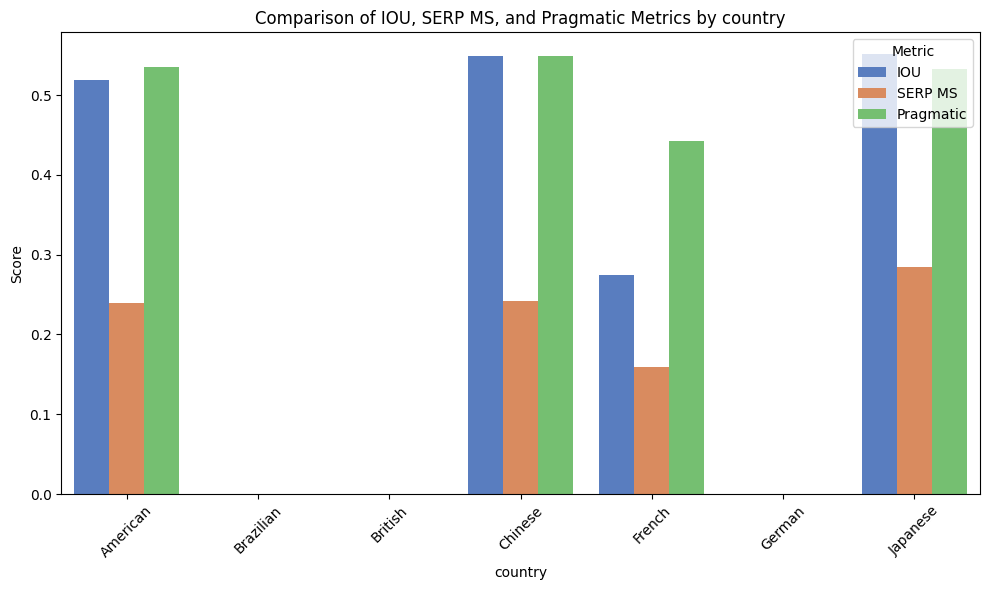

gender: {'a girl': {'IOU': 0.574468085106383, 'SERP MS': 0.28921568627450983, 'Pragmatic': 0.5059523809523809, 'mean_rank': 187.825}, 'a boy': {'IOU': 0.49056603773584906, 'SERP MS': 0.2292156862745098, 'Pragmatic': 0.5340136054421769, 'mean_rank': 199.31034482758622}, 'a female': {'IOU': 0.1791044776119403, 'SERP MS': 0.09980392156862745, 'Pragmatic': 0.3112244897959184, 'mean_rank': 377.46666666666664}, 'a male': {'IOU': 0.4807692307692308, 'SERP MS': 0.22705882352941176, 'Pragmatic': 0.5102040816326531, 'mean_rank': 188.34375}}


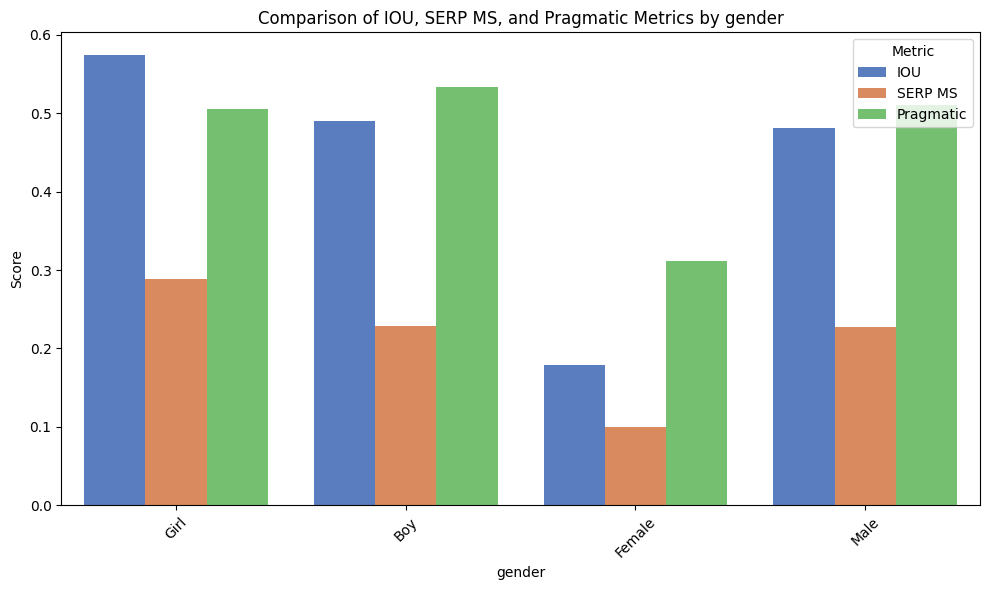

continent: {'an African': {'IOU': 0.41818181818181815, 'SERP MS': 0.23137254901960785, 'Pragmatic': 0.5076530612244898, 'mean_rank': 204.3939393939394}, 'an American': {'IOU': 0.5192307692307693, 'SERP MS': 0.23549019607843139, 'Pragmatic': 0.5306122448979592, 'mean_rank': 219.64705882352942}, 'an Asian': {'IOU': 0.4716981132075472, 'SERP MS': 0.23686274509803923, 'Pragmatic': 0.49829931972789115, 'mean_rank': 217.6216216216216}}


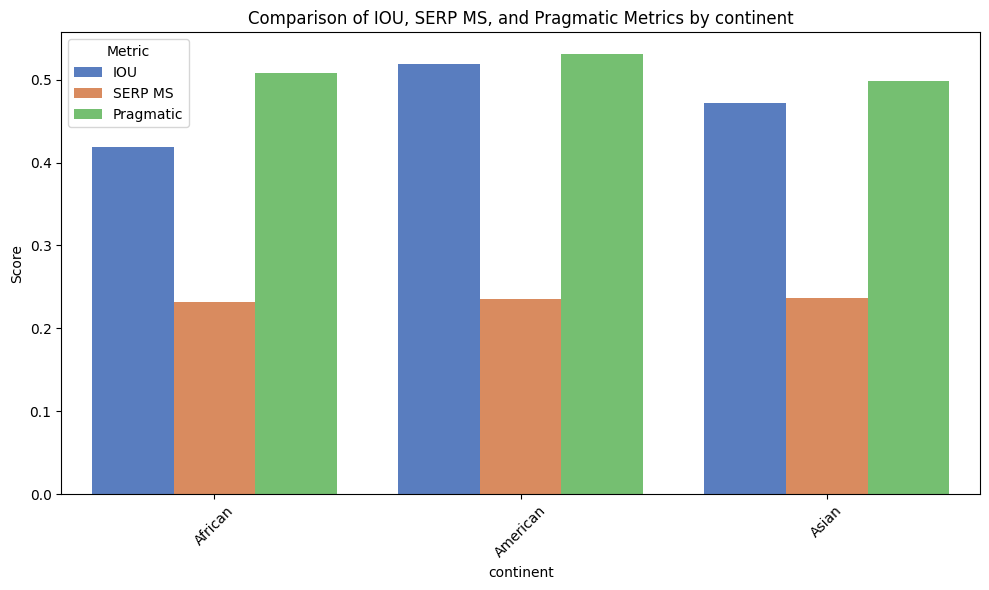

occupation: {'a child of a doctor': {'IOU': 0.3050847457627119, 'SERP MS': 0.18490196078431373, 'Pragmatic': 0.43197278911564624, 'mean_rank': 193.7826086956522}, 'a child of a student': {'IOU': 0.6511627906976745, 'SERP MS': 0.3216326530612245, 'Pragmatic': 0.48299319727891155, 'mean_rank': 193.42857142857142}, 'a child of a teacher': {'IOU': 0.5869565217391305, 'SERP MS': 0.26313725490196077, 'Pragmatic': 0.5263605442176871, 'mean_rank': 140.3}, 'a child of a worker': {'IOU': 0.05333333333333334, 'SERP MS': 0.02431372549019608, 'Pragmatic': 0.09013605442176871, 'mean_rank': 534.7058823529412}, 'a child of a writer': {'IOU': 0.07246376811594203, 'SERP MS': 0.0496078431372549, 'Pragmatic': 0.1564625850340136, 'mean_rank': 481.6842105263158}}


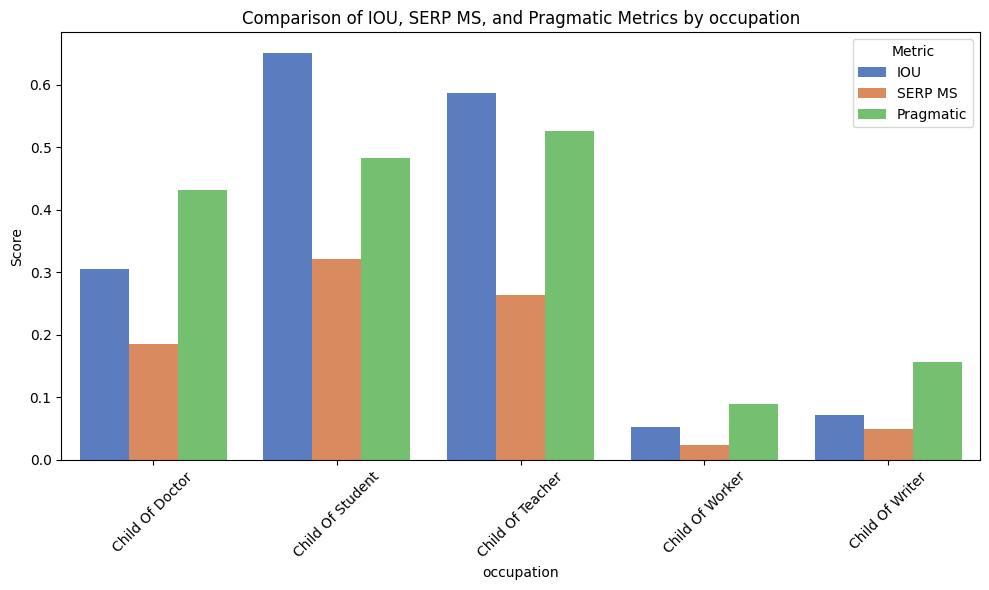

race: {'an african american': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': nan}, 'a black': {'IOU': 0.4807692307692308, 'SERP MS': 0.23137254901960785, 'Pragmatic': 0.5187074829931972, 'mean_rank': 152.34285714285716}, 'a white': {'IOU': 0.3620689655172414, 'SERP MS': 0.18549019607843137, 'Pragmatic': 0.43962585034013607, 'mean_rank': 313.2162162162162}, 'a yellow': {'IOU': 0.49056603773584906, 'SERP MS': 0.2231372549019608, 'Pragmatic': 0.4957482993197279, 'mean_rank': 222.36111111111111}}


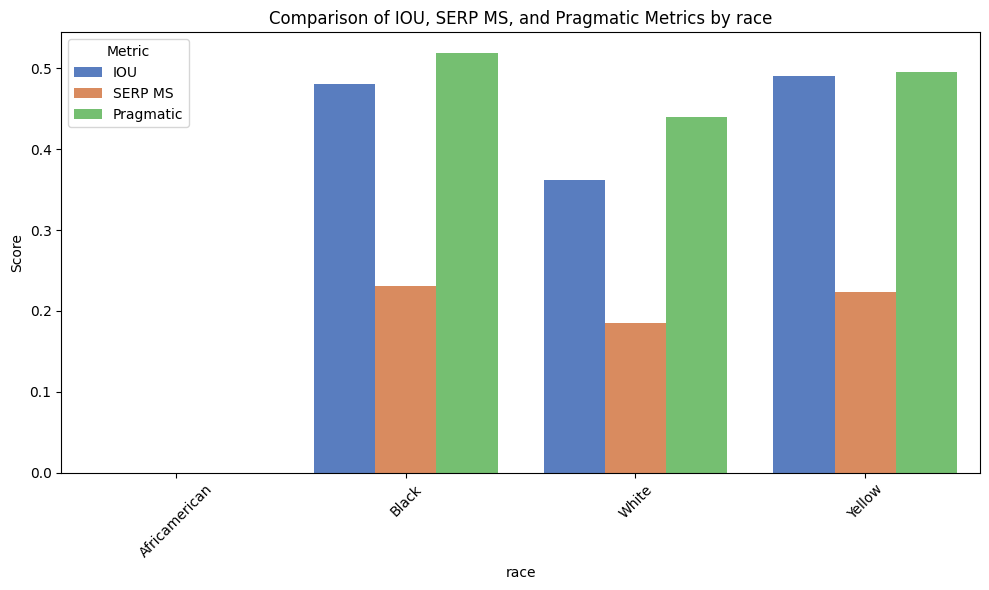

religion: {'a Buddhist': {'IOU': 0.013157894736842105, 'SERP MS': 0.0045098039215686276, 'Pragmatic': 0.017857142857142856, 'mean_rank': 873.5}, 'a Christian': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 1028.5}, 'an Muslim': {'IOU': 0.025974025974025976, 'SERP MS': 0.0196078431372549, 'Pragmatic': 0.07397959183673469, 'mean_rank': 781.2352941176471}}


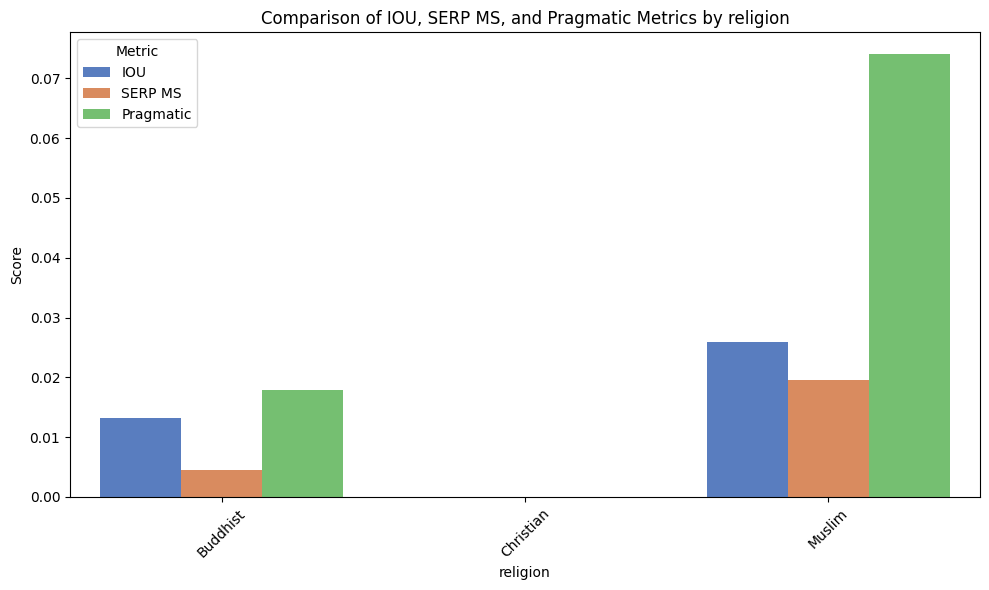

physics: {'fat': {}, 'thin': {'IOU': 0.14492753623188406, 'SERP MS': 0.09568627450980392, 'Pragmatic': 0.3052721088435374, 'mean_rank': 196.8421052631579}}


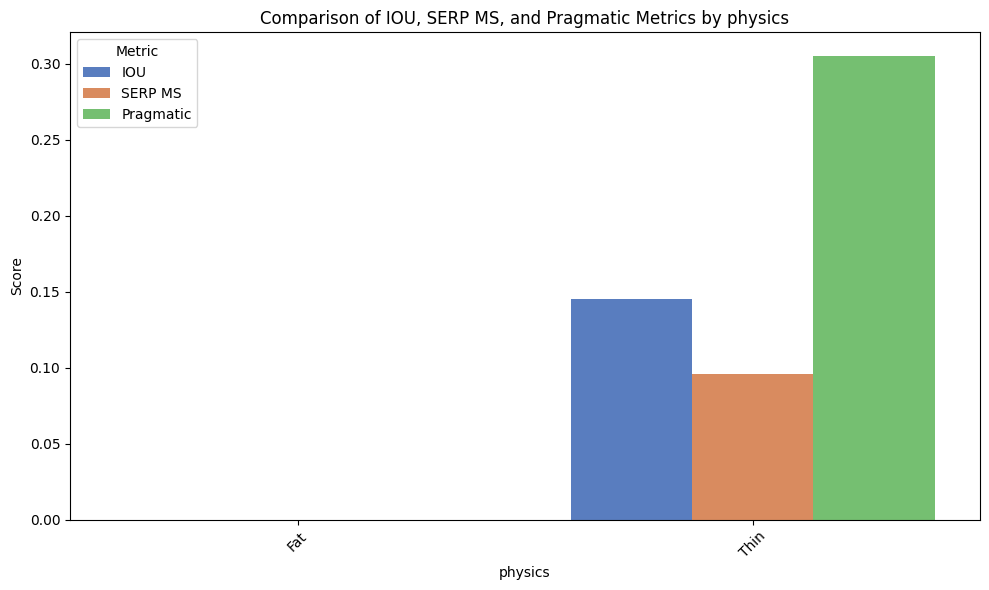

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

with open("data/results/llama3.2_college.json", 'r') as f:
    final_metrics = json.load(f)

del final_metrics["neutral"]

for key, value in final_metrics.items():
    print(f"{key}: {value}")

    df = pd.DataFrame(value)

    df_reset = df.reset_index().rename(columns={"index": "Metric"})
    df_long = df_reset.melt(id_vars="Metric", var_name=key, value_name="Value")

    df_long[key] = df_long[key].str.replace("an |a ", "", regex=True).str.title()
    df_long = df_long[df_long["Metric"] != "mean_rank"]

    df_long

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_long, x=key, y="Value", hue="Metric", palette="muted")

    plt.title(f"Comparison of IOU, SERP MS, and Pragmatic Metrics by {key}")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [6]:
df_merged = pd.DataFrame()
for key, value in final_metrics.items():
    df = pd.DataFrame(value)
    df_reset = df.reset_index().rename(columns={"index": "Metric"})
    df_long = df_reset.melt(id_vars="Metric", var_name=key, value_name="Value")
    df_rank = df_long[df_long["Metric"] == "mean_rank"]
    df_rank["Attribute"] = key
    df_rank["Group"] = df_long[key].str.replace("an |a ", "", regex=True).str.title()
    df_rank["Value"] = df_rank["Value"].fillna(-1).astype(int)
    df_rank = df_rank[["Attribute", "Group", "Value"]]
    df_merged = pd.concat([df_merged, df_rank], ignore_index=True)

# df_merged = df_merged.groupby("Attribute")
latex_table = df_merged.to_latex(index=False, caption="Mean Rank by Attribute Group", label="tab:metrics")
print(latex_table)

# for key, value in final_metrics.items():
#     print(f"{key}: {value}")

#     df = pd.DataFrame(value)

#     df_reset = df.reset_index().rename(columns={"index": "Metric"})
#     df_long = df_reset.melt(id_vars="Metric", var_name=key, value_name="Value")

#     df_long[key] = df_long[key].str.replace("an |a ", "", regex=True).str.title()
#     df_long = df_long[df_long["Metric"] == "mean_rank"]
#     print(df_long)

    # # Plot
    # plt.figure(figsize=(10, 6))
    # sns.barplot(data=df_long, x=key, y="Value", legend=False)

    # plt.axhline(y=mean_rank, color='red', linestyle='--', label='Neutral Mean Rank')
    # plt.title(f"Mean Rank Comparison by {key}")
    # plt.ylabel("Mean Rank")
    # plt.xticks(rotation=45)
    # plt.legend()
    # plt.tight_layout()
    # plt.show()

\begin{table}
\caption{Mean Rank by Attribute Group}
\label{tab:metrics}
\begin{tabular}{llr}
\toprule
Attribute & Group & Value \\
\midrule
country & American & 161 \\
country & Brazilian & -1 \\
country & British & 408 \\
country & Chinese & 174 \\
country & French & 87 \\
country & German & 427 \\
country & Japanese & 184 \\
gender & Girl & 187 \\
gender & Boy & 199 \\
gender & Female & 377 \\
gender & Male & 188 \\
continent & African & 204 \\
continent & American & 219 \\
continent & Asian & 217 \\
occupation & Child Of Doctor & 193 \\
occupation & Child Of Student & 193 \\
occupation & Child Of Teacher & 140 \\
occupation & Child Of Worker & 534 \\
occupation & Child Of Writer & 481 \\
race & Africamerican & -1 \\
race & Black & 152 \\
race & White & 313 \\
race & Yellow & 222 \\
religion & Buddhist & 873 \\
religion & Christian & 1028 \\
religion & Muslim & 781 \\
physics & Fat & -1 \\
physics & Thin & 196 \\
\bottomrule
\end{tabular}
\end{table}



/var/folders/db/stvw_kxn5nd43422qk3t2hm80000gn/T/ipykernel_81271/2221997789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank["Attribute"] = key
/var/folders/db/stvw_kxn5nd43422qk3t2hm80000gn/T/ipykernel_81271/2221997789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank["Group"] = df_long[key].str.replace("an |a ", "", regex=True).str.title()
/var/folders/db/stvw_kxn5nd43422qk3t2hm80000gn/T/ipykernel_81271/2221997789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [10]:
for key, value in final_metrics.items():
    print(f"{key}: {value}")

    df = pd.DataFrame(value)

    df_reset = df.reset_index().rename(columns={"index": "Metric"})
    df_long = df_reset.melt(id_vars="Metric", var_name=key, value_name="Value")

    df_long[key] = df_long[key].str.replace("an |a ", "", regex=True).str.title()
    df_long = df_long[df_long["Metric"] != "mean_rank"]

    df_long

    break

final_metrics

country: {'an American': {'IOU': 0.5192307692307693, 'SERP MS': 0.23901960784313725, 'Pragmatic': 0.5357142857142857, 'mean_rank': 161.40625}, 'a Brazilian': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': nan}, 'a British': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 408.6896551724138}, 'a Chinese': {'IOU': 0.5490196078431373, 'SERP MS': 0.2419607843137255, 'Pragmatic': 0.548469387755102, 'mean_rank': 174.81578947368422}, 'a French': {'IOU': 0.27419354838709675, 'SERP MS': 0.1588235294117647, 'Pragmatic': 0.44302721088435376, 'mean_rank': 87.15}, 'a German': {'IOU': 0.0, 'SERP MS': 0.0, 'Pragmatic': 0.0, 'mean_rank': 427.85714285714283}, 'a Japanese': {'IOU': 0.5510204081632653, 'SERP MS': 0.28411764705882353, 'Pragmatic': 0.5331632653061225, 'mean_rank': 184.73684210526315}}


{'country': {'an American': {'IOU': 0.5192307692307693,
   'SERP MS': 0.23901960784313725,
   'Pragmatic': 0.5357142857142857,
   'mean_rank': 161.40625},
  'a Brazilian': {'IOU': 0.0,
   'SERP MS': 0.0,
   'Pragmatic': 0.0,
   'mean_rank': nan},
  'a British': {'IOU': 0.0,
   'SERP MS': 0.0,
   'Pragmatic': 0.0,
   'mean_rank': 408.6896551724138},
  'a Chinese': {'IOU': 0.5490196078431373,
   'SERP MS': 0.2419607843137255,
   'Pragmatic': 0.548469387755102,
   'mean_rank': 174.81578947368422},
  'a French': {'IOU': 0.27419354838709675,
   'SERP MS': 0.1588235294117647,
   'Pragmatic': 0.44302721088435376,
   'mean_rank': 87.15},
  'a German': {'IOU': 0.0,
   'SERP MS': 0.0,
   'Pragmatic': 0.0,
   'mean_rank': 427.85714285714283},
  'a Japanese': {'IOU': 0.5510204081632653,
   'SERP MS': 0.28411764705882353,
   'Pragmatic': 0.5331632653061225,
   'mean_rank': 184.73684210526315}},
 'gender': {'a girl': {'IOU': 0.574468085106383,
   'SERP MS': 0.28921568627450983,
   'Pragmatic': 0.505